# Le marché des voitures d'occasion

In [128]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import cm 
#voitures neuves et leurs caracteristiques determinante pour leur prix de vente neuve
data = pd.read_csv("carsdata_features.csv", engine='c')
select_df = data[["prix",'marque', 'modele', 'version', "capacite_charge_max_kg",
                 "empattement","capacite_moteur_cc","masse_admissible_max",
                 "couple_max","puissance_max_HP", "date_fin","date_sortie"]]


In [129]:
from datetime import date, datetime
select_df.date_sortie = [ str(x).split('.')[0] for x in select_df.date_sortie ]
select_df.date_sortie = pd.to_datetime(select_df.date_sortie,errors='coerce')
select_df.head()

,prix,marque,modele,version,capacite_charge_max_kg,empattement,capacite_moteur_cc,masse_admissible_max,couple_max,puissance_max_HP,date_fin,date_sortie
0,36945.0,Opel,Zafira,OPC_Turbo_2.0,625.0,2694.0,1998.0,2065.0,250.0,200.0,2005.0,2003-01-01
1,11790.0,Dacia,Sandero,Tce_90_Laureate,563.0,2589.0,898.0,1500.0,135.0,90.0,2015.0,2012-01-01
2,38595.0,Nissan,X-Trail,2.5_4WD_Sport_Outdoor,535.0,2625.0,2488.0,2000.0,230.0,165.0,2006.0,2003-01-01
3,22990.0,Renault,Zoe,Zen,540.0,2588.0,NaN,1943.0,220.0,88.0,NaN,2013-01-01
4,26295.0,Kia,Venga,1.6_CVVT_ExecutiveLine,583.0,2615.0,1591.0,1780.0,156.0,124.0,NaN,2015-01-01


In [130]:
select_df.date_fin = [ str(x).split('.')[0] for x in select_df.date_fin ]
select_df.date_fin = [ date.today() if x == 'NaT' else x for x in select_df.date_fin]
select_df.date_fin = pd.to_datetime(select_df.date_fin,errors='coerce')
select_df.head()

,prix,marque,modele,version,capacite_charge_max_kg,empattement,capacite_moteur_cc,masse_admissible_max,couple_max,puissance_max_HP,date_fin,date_sortie
0,36945.0,Opel,Zafira,OPC_Turbo_2.0,625.0,2694.0,1998.0,2065.0,250.0,200.0,2005-01-01,2003-01-01
1,11790.0,Dacia,Sandero,Tce_90_Laureate,563.0,2589.0,898.0,1500.0,135.0,90.0,2015-01-01,2012-01-01
2,38595.0,Nissan,X-Trail,2.5_4WD_Sport_Outdoor,535.0,2625.0,2488.0,2000.0,230.0,165.0,2006-01-01,2003-01-01
3,22990.0,Renault,Zoe,Zen,540.0,2588.0,NaN,1943.0,220.0,88.0,NaT,2013-01-01
4,26295.0,Kia,Venga,1.6_CVVT_ExecutiveLine,583.0,2615.0,1591.0,1780.0,156.0,124.0,NaT,2015-01-01


In [78]:
#les voitures d'occasion
occas = pd.read_csv("E:/notebooks/cars/cars/lbc_items.csv")

In [79]:
occas.prix = pd.to_numeric(occas.prix.str.replace("\W+",""),errors='coerce')
occas.head()

,prix,marque,km,ville,annee,vitesse,modele,carburant
0,66900.0,Bmw,28 000 KM,Vigny 95450,2015,Automatique,X5,Diesel
1,4800.0,Bmw,185 000 KM,Perpignan 66000,2003,Automatique,X5,Diesel
2,700.0,Renault,425 000 KM,Les Gras 25790,1989,Manuelle,Master,Essence
3,1600.0,Opel,85 000 KM,Le Port 97420,1995,Manuelle,Corsa,Essence
4,19000.0,Volkswagen,100 KM,Le Plessis-Grammoire 49124,1961,Manuelle,Coccinelle,Essence


In [89]:
occas.km = pd.to_numeric(occas.km.str.replace("KM","").str.replace(' ',''),errors='coerce')

In [93]:
occas.annee = pd.to_datetime(occas.annee, errors='coerce')

In [96]:
occas['CP'] = occas.ville.str.split().str[-1]

In [99]:
occas['departement'] = occas.CP.str[:2]

In [101]:
occas.head()

,prix,marque,km,ville,annee,vitesse,modele,carburant,CP,departement
0,66900.0,Bmw,28000.0,Vigny 95450,2015-01-01,Automatique,X5,Diesel,95450,95
1,4800.0,Bmw,185000.0,Perpignan 66000,2003-01-01,Automatique,X5,Diesel,66000,66
2,700.0,Renault,425000.0,Les Gras 25790,1989-01-01,Manuelle,Master,Essence,25790,25
3,1600.0,Opel,85000.0,Le Port 97420,1995-01-01,Manuelle,Corsa,Essence,97420,97
4,19000.0,Volkswagen,100.0,Le Plessis-Grammoire 49124,1961-01-01,Manuelle,Coccinelle,Essence,49124,49


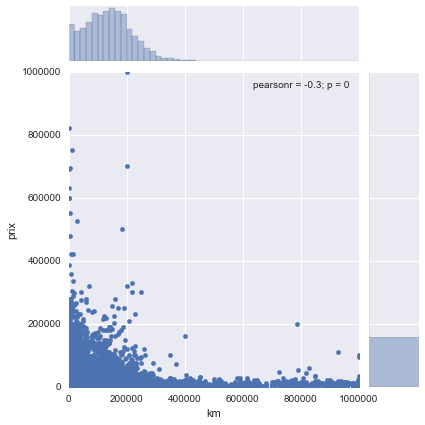

In [114]:
seaborn.jointplot("km","prix",data=occas, kind="scatter", ylim=(0,1e6), xlim=(0,1e6))
plt.show()

In [131]:
select_df.rename(index=str, columns={"date_sortie":"annee"})

C:\Users\Michael\Anaconda\lib\site-packages\pandas\core\frame.py:2816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [132]:
select_df.head()

,prix,marque,modele,version,capacite_charge_max_kg,empattement,capacite_moteur_cc,masse_admissible_max,couple_max,puissance_max_HP,date_fin,annee
0,36945.0,Opel,Zafira,OPC_Turbo_2.0,625.0,2694.0,1998.0,2065.0,250.0,200.0,2005-01-01,2003-01-01
1,11790.0,Dacia,Sandero,Tce_90_Laureate,563.0,2589.0,898.0,1500.0,135.0,90.0,2015-01-01,2012-01-01
2,38595.0,Nissan,X-Trail,2.5_4WD_Sport_Outdoor,535.0,2625.0,2488.0,2000.0,230.0,165.0,2006-01-01,2003-01-01
3,22990.0,Renault,Zoe,Zen,540.0,2588.0,NaN,1943.0,220.0,88.0,NaT,2013-01-01
4,26295.0,Kia,Venga,1.6_CVVT_ExecutiveLine,583.0,2615.0,1591.0,1780.0,156.0,124.0,NaT,2015-01-01


In [142]:
#join Dataframes
df = occas[["marque","modele","annee","prix"]].head(10).merge(
    select_df[["marque","modele","annee","date_fin","prix","version"]], 
    on= ["marque","modele","annee"],how="left", 
    suffixes=("_occas","_neuf"))

In [143]:
df

,marque,modele,annee,prix_occas,date_fin,prix_neuf,version
0,Bmw,X5,2015-01-01,66900.0,NaT,NaN,NaN
1,Bmw,X5,2003-01-01,4800.0,NaT,NaN,NaN
2,Renault,Master,1989-01-01,700.0,NaT,NaN,NaN
3,Opel,Corsa,1995-01-01,1600.0,1996-01-01,14498.0,1.5_TD_Joy
4,Opel,Corsa,1995-01-01,1600.0,1997-01-01,12819.0,1.5_TD_Eco
5,Opel,Corsa,1995-01-01,1600.0,1996-01-01,12320.0,1.5_D_Eco
6,Opel,Corsa,1995-01-01,1600.0,1997-01-01,12093.0,1.4i-16V_Swing
7,Opel,Corsa,1995-01-01,1600.0,1997-01-01,13409.0,1.4i-16V_Swing
8,Opel,Corsa,1995-01-01,1600.0,1996-01-01,14771.0,1.4i-16V_Joy
9,Opel,Corsa,1995-01-01,1600.0,1996-01-01,13455.0,1.4i-16V_Joy
